In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
import joblib
import eda_helper_functions



## connecting to the database

In [249]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

In [251]:
import psycopg2
hostname = 'localhost'
database = 'nyfd'
user_name = 'postgres'
pwd = 'raksha' 
port_id= 5432
conn=None
cur=None

In [253]:
engine = create_engine(f'postgresql://{user_name}:{pwd}@{hostname}:{port_id}/{database}')

In [255]:
sql = 'SELECT * FROM public."vi"'

In [257]:
model_tr = pd.read_sql_query(sql,engine)

In [259]:
model_tr.sample(5)

,restaurant_category,avg_days_bw_inspection,total_critical_violations,total_crit_not_corrected,total_noncritical_violations,permit_status,critical_violation,violation_category
30409,American,78.699115,0.00000,0.00000,2.000000,Active,Not Critical Violation,Administrative and Documentation
1076046,Other,225.818182,0.00000,0.00000,2.000000,Active,Not Critical Violation,Vermin and Sanitation
102954,Other,196.634146,0.81277,0.02875,5.250886,Active,Not Critical Violation,Unknown
407452,Other,42.458333,0.00000,0.00000,18.000000,Active,Not Critical Violation,Administrative and Documentation
1171645,Other,83.900000,0.00000,0.00000,0.000000,Active,Not Critical Violation,Unknown


In [261]:
def mdl(data):
    return data
mld = mdl(model_tr)

In [263]:
mld.columns

Index(['restaurant_category', 'avg_days_bw_inspection',
       'total_critical_violations', 'total_crit_not_corrected',
       'total_noncritical_violations', 'permit_status', 'critical_violation',
       'violation_category'],
      dtype='object')

In [265]:
mld.dtypes

restaurant_category              object
avg_days_bw_inspection          float64
total_critical_violations       float64
total_crit_not_corrected        float64
total_noncritical_violations    float64
permit_status                    object
critical_violation               object
violation_category               object
dtype: object

In [267]:
mld.shape

(1293946, 8)

In [269]:
X = mld.drop(columns=['critical_violation'])
y = mld['critical_violation'].copy()

In [271]:
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(828124, 7) (828124,)
(207032, 7) (207032,)
(258790, 7) (258790,)


In [273]:
train_df = pd.concat([X_train,y_train],axis=1)
train_df

,restaurant_category,avg_days_bw_inspection,total_critical_violations,total_crit_not_corrected,total_noncritical_violations,permit_status,violation_category,critical_violation
732792,American,153.166667,0.81277,0.02875,5.250886,Active,Unknown,Not Critical Violation
395735,American,56.134921,0.00000,0.00000,4.000000,Active,Facility and Equipment,Not Critical Violation
302987,Other,81.337079,2.00000,0.00000,6.000000,Active,Vermin and Sanitation,Not Critical Violation
262520,Other,63.319527,1.00000,0.00000,5.000000,Active,Administrative and Documentation,Not Critical Violation
452750,Other,22.973510,1.00000,0.00000,16.000000,Active,Facility and Equipment,Not Critical Violation
...,...,...,...,...,...,...,...,...
972935,American,383.260870,0.00000,0.00000,3.000000,Expired,Administrative and Documentation,Not Critical Violation
624837,Fast Food,34.088000,0.00000,0.00000,3.000000,Active,Administrative and Documentation,Not Critical Violation
981215,Other,221.809524,0.00000,0.00000,7.000000,Active,Administrative and Documentation,Not Critical Violation
1236327,Italian,110.888889,0.00000,0.00000,2.000000,Active,Facility and Equipment,Not Critical Violation


In [275]:
val_df = pd.concat([X_val,y_val],axis=1)
test_df = pd.concat([X_test,y_test],axis=1)

In [277]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 828124 entries, 732792 to 369183
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   restaurant_category           828124 non-null  object 
 1   avg_days_bw_inspection        828124 non-null  float64
 2   total_critical_violations     828124 non-null  float64
 3   total_crit_not_corrected      828124 non-null  float64
 4   total_noncritical_violations  828124 non-null  float64
 5   permit_status                 828124 non-null  object 
 6   violation_category            828124 non-null  object 
dtypes: float64(4), object(3)
memory usage: 50.5+ MB


In [279]:
mld.restaurant_category.value_counts()

restaurant_category
Other        655408
American     245527
Fast Food    167009
Italian       81602
Chinese       62750
Mexican       30014
Indian        27883
Japanese      23753
Name: count, dtype: int64

In [281]:
mld[mld.duplicated() ==True]

,restaurant_category,avg_days_bw_inspection,total_critical_violations,total_crit_not_corrected,total_noncritical_violations,permit_status,critical_violation,violation_category
1,Fast Food,30.735915,0.81277,0.02875,5.250886,Active,Not Critical Violation,Unknown
2,Fast Food,30.735915,0.81277,0.02875,5.250886,Active,Not Critical Violation,Unknown
5,Fast Food,30.735915,0.81277,0.02875,5.250886,Active,Critical Violation,Unknown
6,Fast Food,30.735915,0.81277,0.02875,5.250886,Active,Critical Violation,Unknown
7,Fast Food,30.735915,0.81277,0.02875,5.250886,Active,Not Critical Violation,Unknown
...,...,...,...,...,...,...,...,...
1293941,Other,68.169811,0.00000,0.00000,9.000000,Active,Not Critical Violation,Administrative and Documentation
1293942,Other,68.169811,0.00000,0.00000,9.000000,Active,Not Critical Violation,Vermin and Sanitation
1293943,Other,68.169811,0.00000,0.00000,9.000000,Active,Not Critical Violation,Administrative and Documentation
1293944,Other,68.169811,0.00000,0.00000,9.000000,Active,Not Critical Violation,Facility and Equipment


## DATA PREPROCESSING

In [299]:
X_train.columns

Index(['restaurant_category', 'avg_days_bw_inspection',
       'total_critical_violations', 'total_crit_not_corrected',
       'total_noncritical_violations', 'permit_status', 'violation_category'],
      dtype='object')

In [301]:
cat_cols = ['restaurant_category','permit_status','violation_category']
num_cols = ['avg_days_bw_inspection','total_critical_violations','total_crit_not_corrected','total_noncritical_violations']

In [303]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
num_transformer = Pipeline(steps=[
	("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
	("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

In [305]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
	("num", num_transformer, num_cols),
	("cat", cat_transformer, cat_cols)
])


In [307]:
pr = preprocessor.fit_transform(X_train)
pr

array([[ 5.15717563e-01, -3.41135481e-03, -1.39851796e-04, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-4.68229758e-01, -5.85653702e-01, -9.76979323e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.12668080e-01,  8.47081252e-01, -9.76979323e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.21178826e+00, -5.85653702e-01, -9.76979323e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.70011077e-02, -5.85653702e-01, -9.76979323e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.87679265e-01, -5.85653702e-01, -9.76979323e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

## PCA [DIMENSIONALITY REDUCTION]

In [309]:
from sklearn.decomposition import PCA
pca_pipeline= Pipeline(
    steps=[
        ('pca', PCA(n_components=0.95))
    ]
)
pca_features = pca_pipeline.fit_transform(pr)
feature_names = pca_pipeline.named_steps['pca'].get_feature_names_out()

In [311]:
num_components = pca_pipeline.named_steps['pca'].n_components_
print(num_components)

11


In [313]:
pca_df = pd.DataFrame(pca_features, columns=feature_names)
pca_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-0.336209,0.275105,0.419158,0.027312,-0.867674,-0.234418,0.080619,-0.397213,-0.352696,0.771233,-0.115011
1,-0.204804,-0.375207,-0.692265,-0.095378,-0.748187,-0.618902,-0.073963,0.686812,0.171042,0.547459,-0.159520
2,0.629470,0.014496,0.449175,-0.448292,0.530101,-0.348788,0.198269,-0.485052,0.735336,-0.165225,-0.065813
3,0.223857,-0.226458,-0.185152,-0.113686,0.596528,0.577319,0.453274,0.137384,0.043510,0.049826,-0.054414
4,1.767277,-0.684725,0.085547,1.174479,0.528148,-0.942416,0.035932,0.447975,-0.249910,0.112627,-0.079308
...,...,...,...,...,...,...,...,...,...,...,...
828119,-1.934837,0.861846,1.388525,1.005386,-0.900391,1.235163,-1.192009,0.345790,0.424883,0.270589,-0.084256
828120,-0.246263,-0.476622,-0.979255,-0.160864,-0.427519,0.562152,0.427536,0.052660,-0.268429,-0.719341,-0.359924
828121,-0.723955,0.191650,0.591560,1.115792,0.409741,0.559413,0.351871,0.221241,0.117535,-0.021306,-0.025117
828122,-0.741072,-0.094329,-0.408169,-0.187958,-0.418704,-0.589590,-0.005711,0.726597,0.008529,-0.245329,0.855710


In [315]:
train_df

,restaurant_category,avg_days_bw_inspection,total_critical_violations,total_crit_not_corrected,total_noncritical_violations,permit_status,violation_category,critical_violation
732792,American,153.166667,0.81277,0.02875,5.250886,Active,Unknown,Not Critical Violation
395735,American,56.134921,0.00000,0.00000,4.000000,Active,Facility and Equipment,Not Critical Violation
302987,Other,81.337079,2.00000,0.00000,6.000000,Active,Vermin and Sanitation,Not Critical Violation
262520,Other,63.319527,1.00000,0.00000,5.000000,Active,Administrative and Documentation,Not Critical Violation
452750,Other,22.973510,1.00000,0.00000,16.000000,Active,Facility and Equipment,Not Critical Violation
...,...,...,...,...,...,...,...,...
972935,American,383.260870,0.00000,0.00000,3.000000,Expired,Administrative and Documentation,Not Critical Violation
624837,Fast Food,34.088000,0.00000,0.00000,3.000000,Active,Administrative and Documentation,Not Critical Violation
981215,Other,221.809524,0.00000,0.00000,7.000000,Active,Administrative and Documentation,Not Critical Violation
1236327,Italian,110.888889,0.00000,0.00000,2.000000,Active,Facility and Equipment,Not Critical Violation


In [317]:
val_df.shape

(207032, 8)

In [319]:
test_df.shape

(258790, 8)

## MODEL SELECTION

In [321]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import lightgbm as lgb
from catboost import CatBoostClassifier

In [323]:
from sklearn.preprocessing import LabelEncoder

def split_data(data):
    X = data.drop(columns=["critical_violation"])
    y = data.critical_violation.copy()
    le = LabelEncoder()
    y = le.fit_transform(y)
    return (X, y)
data = pd.concat([train_df, val_df], axis=0)
X_data, y_data = split_data(data)
print(X_data.shape, y_data.shape)

(1035156, 7) (1035156,)


In [325]:
algorithms = {
    'CAT MODEL': CatBoostClassifier(),
    'XGBOOST CLASSIFIER': XGBClassifier(),
    'LGB': lgb.LGBMClassifier(),
    'logistic regression': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [327]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [329]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
        ("pca",pca_pipeline),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=X_data,
		y=y_data,
		cv=3,
		scoring="accuracy",
		n_jobs=-1,
		random_state=42
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="accuracy", title=name)

	ax.legend(loc="lower right")

	plt.show()

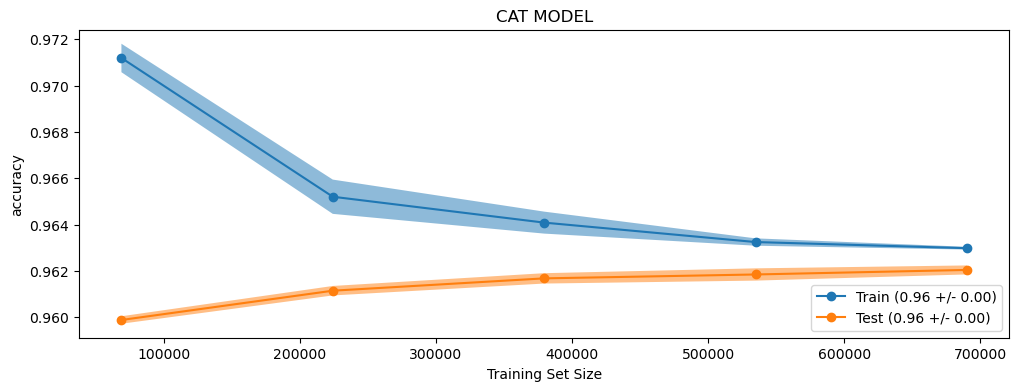

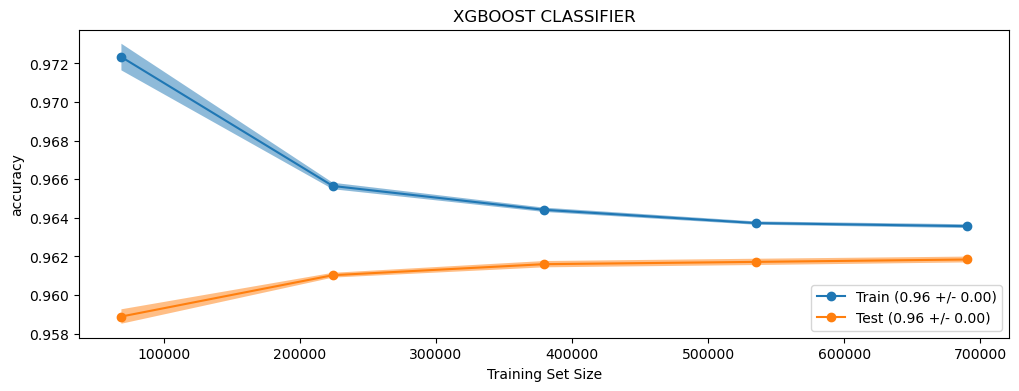

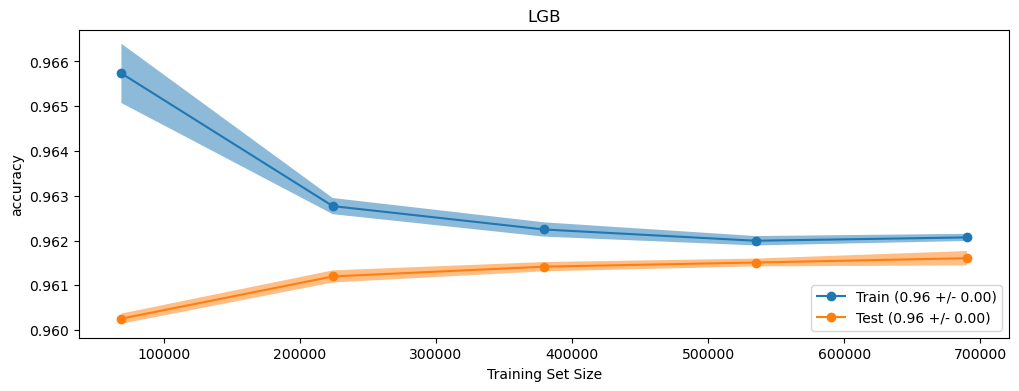

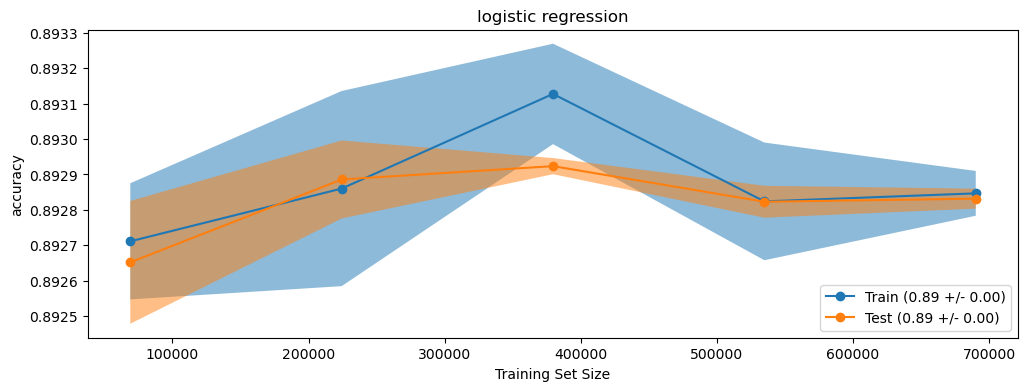

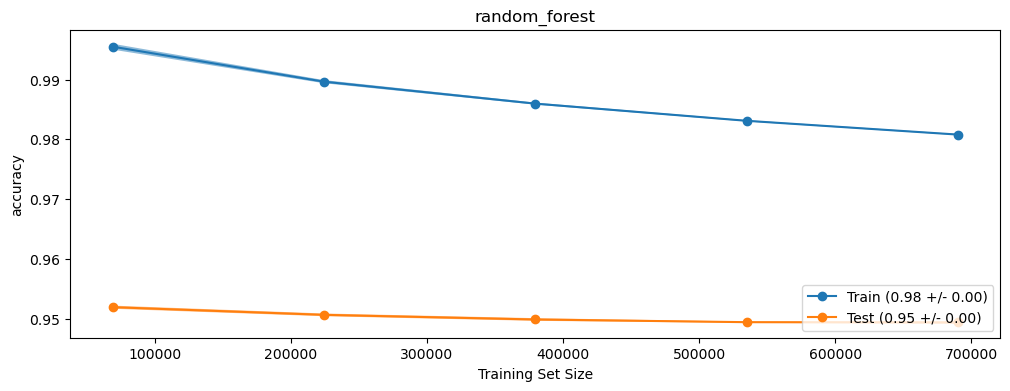

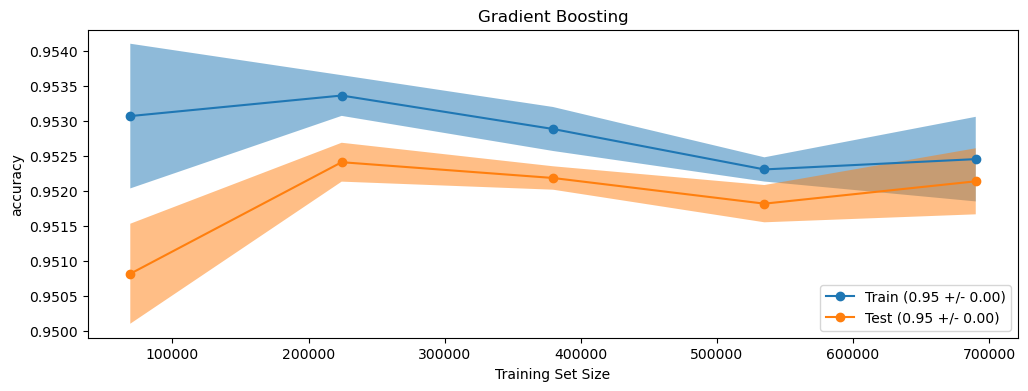

In [343]:
for name, alg in algorithms.items():
	plot_learning_curves(name, alg)

## Hyper parameter tuning

In [382]:
y_en_val = le.fit_transform(y_val)
y_en_val

array([1, 1, 1, ..., 1, 1, 1])

In [446]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'XGBOOST__max_depth': [3, 5, 7],
    'XGBOOST__learning_rate': [0.01,0.2,0.1, 0.5, 1],
    'XGBOOST__n_estimators': [50, 100, 200,300],
    'XGBOOST__n_estimators': [100, 200, 300],
    'XGBOOST__subsample': [0.8, 0.9, 1.0],
    'XGBOOST__colsample_bytree': [0.8, 0.9, 1.0],
    'XGBOOST__gamma': [0, 0.1, 0.2],
}


In [448]:
grid_search = GridSearchCV(ml,param_grid,n_jobs=-1 )

In [426]:
grid_search.fit(X_val,y_en_val)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['avg_days_bw_inspection',
                                                                                'total_critical_violations',
                                                                                'total_crit_not_corrected',
                                                                                'total_noncritical_violations']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=Fals...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=200,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'XGBOOST__colsample_bytree': [0.8, 0.9,
                                                                      1.0],
                                        'XGBOOST__gamma': [0, 0.1, 0.2],
                                        'XGBOOST__learning_rate': [0.01, 0.2,
                                                                   0.1, 0.5,
                                                                   1],
                                        'XGBOOST__max_depth': [3, 5, 7],
                                        'XGBOOST__n_estimators': [100, 200,
                                                                  300],
                                        'XGBOOST__subsample': [0.8, 0.9, 1.0]})

In [428]:
random_search.best_params_

{'XGBOOST__subsample': 0.8,
 'XGBOOST__n_estimators': 300,
 'XGBOOST__max_depth': 5,
 'XGBOOST__learning_rate': 0.1,
 'XGBOOST__gamma': 0.2,
 'XGBOOST__colsample_bytree': 1.0}

In [578]:

import optuna
from optuna.integration import CatBoostPruningCallback

import catboost as cb
from sklearn.metrics import accuracy_score
def objective(trial: optuna.Trial) -> float:

    transformer = Pipeline(steps=ml.steps[:-1])  # Remove the final classifier step
    transformed_X = transformer.fit_transform(X_data)
    

    train_x, valid_x, train_y, valid_y = train_test_split(transformed_X, y_data, test_size=0.25)
    
    #  parameters for the CatBoostClassifier
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "used_ram_limit": "3gb",
        "eval_metric": "Accuracy",
    }

    # Adjust parameters based on the selected bootstrap type
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    # Initializing the CatBoostClassifier with the suggested parameters
    gbm = cb.CatBoostClassifier(**param)

    # Defining the pruning callback
    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
    
   
    gbm.fit(
        train_x,
        train_y,
        eval_set=[(valid_x, valid_y)],
        verbose=0,
        early_stopping_rounds=100,
        callbacks=[pruning_callback],
    )

    # Manually check for pruning
    pruning_callback.check_pruned()

   
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)

    return accuracy

if __name__ == "__main__":
    # Create a study object and optimize the objective function
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
    study.optimize(objective, n_trials=100, timeout=600)

    
    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2024-08-15 11:00:20,366] A new study created in memory with name: no-name-ecd20093-f369-41a0-a9e5-ba7c40b99858
C:\Users\STSC\AppData\Local\Temp\ipykernel_13888\764753912.py:47: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
[I 2024-08-15 11:00:47,429] Trial 0 finished with value: 0.8835228699828818 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.06347928019908722, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.072485232759893}. Best is trial 0 with value: 0.8835228699828818.
C:\Users\STSC\AppData\Local\Temp\ipykernel_13888\764753912.py:47: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
[I 2024-08-15 11:01:00,793] Trial 1 finished with

Number of finished trials: 52
Best trial:
  Value: 0.9587501787170243
  Params: 
    objective: Logloss
    colsample_bylevel: 0.06768930579193647
    depth: 6
    boosting_type: Plain
    bootstrap_type: Bernoulli
    subsample: 0.36770104408481186


## FINAL MODEL

In [580]:
ml = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_pipeline),
    ('catboost', CatBoostClassifier(
        objective='Logloss',
        colsample_bylevel=0.06768930579193647,
        depth=6,
        boosting_type='Plain',
        bootstrap_type='Bernoulli',
        subsample=0.36770104408481186
    ))
])

In [582]:
ml.fit(X_data,y_data)

Learning rate set to 0.199683
0:	learn: 0.4661051	total: 114ms	remaining: 1m 53s
1:	learn: 0.3844743	total: 198ms	remaining: 1m 38s
2:	learn: 0.3421968	total: 262ms	remaining: 1m 26s
3:	learn: 0.3248286	total: 316ms	remaining: 1m 18s
4:	learn: 0.2690507	total: 423ms	remaining: 1m 24s
5:	learn: 0.2654998	total: 478ms	remaining: 1m 19s
6:	learn: 0.2632804	total: 531ms	remaining: 1m 15s
7:	learn: 0.2618874	total: 590ms	remaining: 1m 13s
8:	learn: 0.2610091	total: 649ms	remaining: 1m 11s
9:	learn: 0.2502469	total: 732ms	remaining: 1m 12s
10:	learn: 0.2480239	total: 788ms	remaining: 1m 10s
11:	learn: 0.2376012	total: 871ms	remaining: 1m 11s
12:	learn: 0.2376011	total: 911ms	remaining: 1m 9s
13:	learn: 0.2317636	total: 980ms	remaining: 1m 9s
14:	learn: 0.2315000	total: 1.07s	remaining: 1m 10s
15:	learn: 0.2314976	total: 1.14s	remaining: 1m 9s
16:	learn: 0.2314967	total: 1.19s	remaining: 1m 9s
17:	learn: 0.2305634	total: 1.26s	remaining: 1m 9s
18:	learn: 0.2305618	total: 1.31s	remaining: 1m 7

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_days_bw_inspection',
                                                   'total_critical_violations',
                                                   'total_crit_not_corrected',
                                                   'total_noncritical_violations']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['restaurant_category',
                                                   'permit_status',
                                                   'violation_category'])])),
                ('pca', Pipeline(steps=[('pca', PCA(n_components=0.95))])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x0000027FB283D640>)])

## MODEL PERSISTENCE

In [584]:
joblib.dump(ml, "mold.joblib")

['mold.joblib']

In [586]:
saved_model = joblib.load("mold.joblib")
saved_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_days_bw_inspection',
                                                   'total_critical_violations',
                                                   'total_crit_not_corrected',
                                                   'total_noncritical_violations']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['restaurant_category',
                                                   'permit_status',
                                                   'violation_category'])])),
                ('pca', Pipeline(steps=[('pca', PCA(n_components=0.95))])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x0000027FC0667DD0>)])

In [588]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_en = le.fit_transform(y_test)

In [590]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = saved_model.predict(X_test)
classification_report(y_test_en, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.76      0.81     30269\n           1       0.97      0.99      0.98    228521\n\n    accuracy                           0.96    258790\n   macro avg       0.92      0.87      0.89    258790\nweighted avg       0.96      0.96      0.96    258790\n'

+--------+------------+--------+----------+----------+
| Class  | Precision | Recall | F1-score | Support  |
+--------+------------+--------+----------+----------+
| 0      | 0.97      | 0.94   | 0.95     | 30,396   |
| 1      | 0.99      | 1.00   | 0.99     | 228,394  |
+--------+------------+--------+----------+----------+

Accuracy: 0.99

In [505]:
confusion_matrix(y_test_en,y_pred)

array([[ 23633,   6636],
       [  3262, 225259]], dtype=int64)

## STACKING

In [594]:
estimators = [
    ('lgbm',lgb.LGBMClassifier()),
    ('xgb',XGBClassifier()),
    ('gbdt',LogisticRegression()),
    ('rf',RandomForestClassifier(random_state=42)),
    ('gb',GradientBoostingClassifier())    
]

In [596]:
from sklearn.ensemble import StackingClassifier

md = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_pipeline),
    ('stacker', StackingClassifier(
        estimators=estimators, 
        final_estimator=CatBoostClassifier(
            objective='Logloss',
            colsample_bylevel=0.06768930579193647,
            depth=6,
            boosting_type='Plain',
            bootstrap_type='Bernoulli',
            subsample=0.36770104408481186
        ), 
        cv=3
    ))
])


In [598]:
md.fit(X_data, y_data)
y_predi = md.predict(X_test)

[LightGBM] [Info] Number of positive: 914104, number of negative: 121052
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 1035156, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.883059 -> initscore=2.021724
[LightGBM] [Info] Start training from score 2.021724
[LightGBM] [Info] Number of positive: 609402, number of negative: 80702
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 690104, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.883058 -> initscore=2.021715
[LightGBM] [Info] Start training from score 2.021715
[LightGBM]

In [600]:
classification_report(y_test_en, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.76      0.81     30269\n           1       0.97      0.99      0.98    228521\n\n    accuracy                           0.96    258790\n   macro avg       0.92      0.87      0.89    258790\nweighted avg       0.96      0.96      0.96    258790\n'

## XGBOOST

In [622]:
mkl = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_pipeline),
    ('XGBOOST', XGBClassifier(reg_alpha=0.1,reg_lambda=0.1,n_estimators=300,max_depth=5,learning_rate=0.1,gamma=0.2,colsample_bytree=1.0,subsample=0.8,max_delta_step = 1)
    )])

In [624]:
mkl.fit(X_data,y_data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_days_bw_inspection',
                                                   'total_critical_violations',
                                                   'total_crit_not_corrected',
                                                   'total_noncritical_violations']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['restaurant_category',...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [626]:
joblib.dump(mkl, "xgboostmdl.joblib")

['xgboostmdl.joblib']

In [628]:
save_model = joblib.load("xgboostmdl.joblib")
save_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_days_bw_inspection',
                                                   'total_critical_violations',
                                                   'total_crit_not_corrected',
                                                   'total_noncritical_violations']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['restaurant_category',...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [630]:
y_predict = save_model.predict(X_test)
classification_report(y_test_en, y_predict)

'              precision    recall  f1-score   support\n\n           0       0.88      0.78      0.83     30269\n           1       0.97      0.99      0.98    228521\n\n    accuracy                           0.96    258790\n   macro avg       0.93      0.88      0.90    258790\nweighted avg       0.96      0.96      0.96    258790\n'

- Xgboost alone performing better than stackling and hyperparametertuning of xg_boost gave same results as compared to with out parameters.